# Team 10
*   Nabilla Harahap
*   Meng Zhang
*   Ziyi Liu





##Download the stock data


###Import modules

In [ ]:
# import modules
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# some stock-specific packages
!pip install yahoo_fin
!pip install requests_html
import yahoo_fin.stock_info as si

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 81 kB 3.5 MB/s 
     |████████████████████████████████| 50 kB 1.0 MB/s 
     |████████████████████████████████| 83 kB 349 kB/s 
     |████████████████████████████████| 127 kB 2.7 MB/s 
     |████████████████████████████████| 106 kB 16.8 MB/s 
  Created wheel for parse: filename=parse-1.19.0-py3-none-any.whl size=24591 sha256=abed27994a825fb2084eab0b3cc389fbe2db479c4063acab197c3497298a6dc6
  Stored in directory: /root/.cache/pip/wheels/e5/33/1f/68392720485b3ecf125a69e700baaab7624616deedea2fa6e2
  Created wheel for sgmllib3k: filename=sgmllib3k-1.0.0-py3-none-any.whl size=6066 sha256=be95cebabb076626a7e21bfc6fbc0b9a6cde2a2165f82083ef2be21464f627fd
  Stored in directory: /root/.cache/pip/wheels/83/63/2f/117884c3b19d46b64d3d61690333aa80c88dc14050e269c546
Successfully built parse sgmllib3k
  Attempting uninstall: urllib3
    Found existing installation: 

### Select 4 stocks and 4 cryptocurriencies

In [ ]:
# Assign the ticker list that we want to scrap
tickers_list = ['XRP-USD','SOL-USD','LUNA1-USD','ADA-USD','BBBY','AGIO','CCRN','CEIX']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2016',end_date='12/31/2020',interval='1d') for ticker in tickers_list}

According to market caps for our group, we selected those cryptocurrencies and stocks

The 4 cryptocurrencies we selected are: XRP USD, Solana USD, Terra USD and Cardano USD.

The 4 stocks we selected are: Bed Bath & Beyond Inc., Agios Pharmaceuticals Inc., Cross Country Healthcare Inc. and CONSOL Energy Inc.

In [ ]:
# take a peak!
dow_prices

{'WMT':                   open        high         low       close    adjclose  \
 2017-01-03   69.239998   69.239998   68.050003   68.660004   61.311600   
 2017-01-04   68.660004   69.629997   68.599998   69.059998   61.668785   
 2017-01-05   68.430000   69.330002   68.120003   69.209999   61.802731   
 2017-01-06   68.410004   68.500000   68.010002   68.260002   60.954414   
 2017-01-09   68.330002   68.800003   68.320000   68.709999   61.356236   
 ...                ...         ...         ...         ...         ...   
 2020-12-24  143.539993  144.389999  143.179993  143.500000  139.591934   
 2020-12-28  144.039993  145.300003  143.330002  145.220001  141.265076   
 2020-12-29  145.639999  145.850006  143.589996  144.300003  140.370148   
 2020-12-30  144.880005  145.149994  143.940002  144.179993  140.253387   
 2020-12-31  144.199997  144.270004  142.850006  144.149994  140.224213   
 
               volume ticker  
 2017-01-03  10473200    WMT  
 2017-01-04   7918000    WMT 

### extract the adjclose data

In [ ]:
# let's extract just the data we need (adjclose)
# get the adjclose price for the XRP-USD (one sample)
prep_data = pd.DataFrame(dow_prices['XRP-USD']['adjclose']).rename(columns = {"adjclose":"XRP-USD"})

# combine all the tickers (all the rest of the samples)
for i in tickers_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,WMT,TGT,COST,XOM,DVN,CVX,BAC,V,AXP
2017-01-03,61.311600,61.974167,141.645111,67.322083,38.342369,91.029160,19.883812,76.391357,69.060654
2017-01-04,61.668785,62.877155,141.671722,66.581383,38.684422,91.006004,20.254486,77.015945,70.192818
2017-01-05,61.802731,61.812321,144.465073,65.588852,39.914173,90.612061,20.016199,77.919220,69.327591
2017-01-06,60.954414,60.858223,144.394135,65.551819,39.637276,90.249031,20.016199,78.995399,69.465652
2017-01-09,61.356236,60.849701,142.744766,64.470390,37.935162,89.476608,19.901470,78.553383,69.824631
...,...,...,...,...,...,...,...,...,...
2020-12-24,139.591934,169.235962,359.414368,37.694798,13.651176,78.261147,28.725281,205.868561,114.512489
2020-12-28,141.265076,170.395172,365.802582,37.821659,13.668987,77.866776,28.888275,209.745255,115.498077
2020-12-29,140.370148,169.091064,367.439087,37.395775,13.633368,77.600792,28.773218,211.461655,115.283394
2020-12-30,140.253387,167.970459,369.144531,37.694798,14.372472,78.261147,28.744455,215.397491,116.542198


In [ ]:
#check the shape
prep_data.shape

(1007, 9)

### calculate the return and drop the NA

In [ ]:
# create return features for each ticker, 
# we will just use a pct_change as the return
return_data = pd.DataFrame()
for i in tickers_list:
  return_data[i] = prep_data[i].pct_change()
# drop the na records
return_data.dropna(inplace=True)
return_data

,WMT,TGT,COST,XOM,DVN,CVX,BAC,V,AXP
2017-01-04,0.005826,0.014570,0.000188,-0.011002,0.008921,-0.000254,0.018642,0.008176,0.016394
2017-01-05,0.002172,-0.016935,0.019717,-0.014907,0.031789,-0.004329,-0.011765,0.011728,-0.012326
2017-01-06,-0.013726,-0.015435,-0.000491,-0.000565,-0.006937,-0.004006,0.000000,0.013811,0.001991
2017-01-09,0.006592,-0.000140,-0.011423,-0.016497,-0.042942,-0.008559,-0.005732,-0.005595,0.005168
2017-01-10,-0.006986,0.000000,0.004286,-0.012753,0.002576,-0.007597,0.017295,-0.005382,0.010414
...,...,...,...,...,...,...,...,...,...
2020-12-24,0.001955,0.001601,0.007433,-0.004070,-0.021073,-0.004201,-0.002995,0.016561,0.003420
2020-12-28,0.011986,0.006850,0.017774,0.003365,0.001305,-0.005039,0.005674,0.018831,0.008607
2020-12-29,-0.006335,-0.007653,0.004474,-0.011260,-0.002606,-0.003416,-0.003983,0.008183,-0.001859
2020-12-30,-0.000832,-0.006627,0.004641,0.007996,0.054213,0.008510,-0.001000,0.018613,0.010919


In [ ]:
# check the size of the cleaned data
return_data.shape

(1006, 9)

In [ ]:
#Use the cleaned dataframe
df=return_data

### check the volatility for each asset

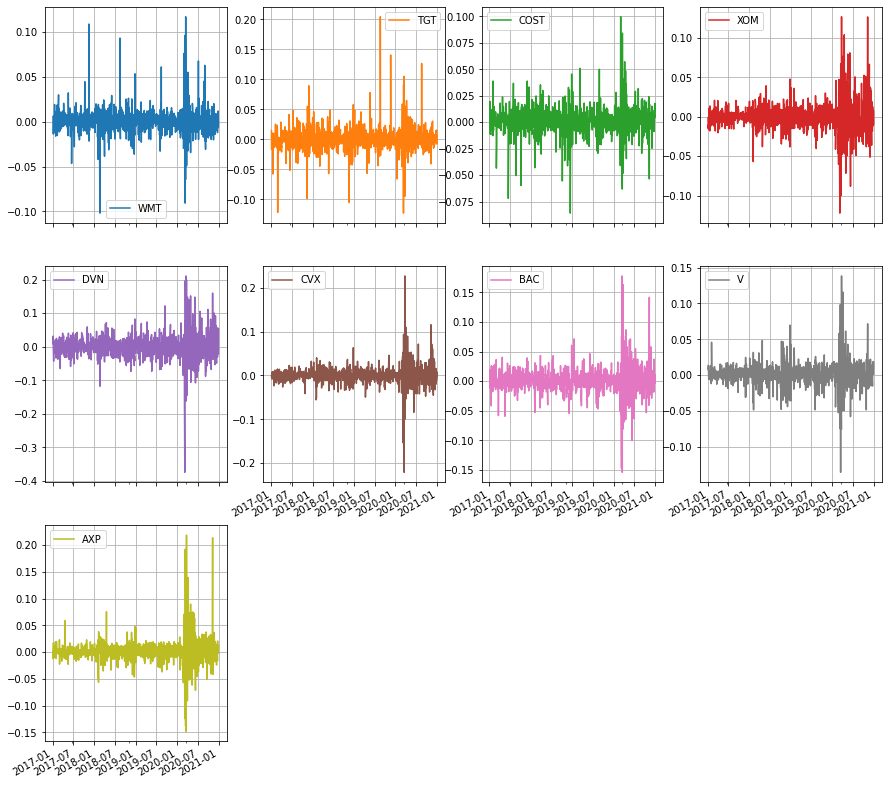

In [ ]:
#plot time-series visualization for each asset
return_data.plot(subplots=True,
        grid=True, 
        layout=(3,4),
         figsize=(15,15))
plt.show()

For cryptocurrencies, the volatility for XRP-USD is low and steady :

until the end of 2020 which began to fluctuate actively. The rest three cryptocurrencies fluctuated sharply, especially for SOL-USD, which even has a positive return at around 0.5.

At looking at the range of fluctuating, we could see the range of XRP-USD and SOL-USD is 0.8 approximately, which is higher than the range of the two other cryptocurrencies.

Compared to cryptocurrencies, the volatility for these four stocks are slight. For most time, the spikes are under 0.2. 

So, the risk for investing the stocks is pretty low compared to  investing money to cryptocurrencies.

In [ ]:
#calculate the average return and standard deviation of return for each 
Avg_Return = pd.DataFrame(np.mean(df) ,columns=["Avg_Return"])
print(Avg_Return)
Std_Dev_Return = pd.DataFrame(np.std(df) ,columns=["Std_Dev_Return"])
print(Std_Dev_Return)

      Avg_Return
WMT     0.000926
TGT     0.001213
COST    0.001056
XOM    -0.000400
DVN    -0.000301
CVX     0.000083
BAC     0.000627
V       0.001179
AXP     0.000784
      Std_Dev_Return
WMT         0.014449
TGT         0.020440
COST        0.013947
XOM         0.019252
DVN         0.036751
CVX         0.021939
BAC         0.022371
V           0.017115
AXP         0.022642


In [ ]:
# here's the covariance matrix
Covariance_matrix = df.cov()
Covariance_matrix

,WMT,TGT,COST,XOM,DVN,CVX,BAC,V,AXP
WMT,0.000209,0.000136,0.000122,0.000066,0.000063,0.000071,0.000094,0.000088,0.000084
TGT,0.000136,0.000418,0.000137,0.000112,0.000148,0.000128,0.000148,0.000109,0.000127
COST,0.000122,0.000137,0.000195,0.000079,0.000100,0.000089,0.000109,0.000113,0.000104
XOM,0.000066,0.000112,0.000079,0.000371,0.000521,0.000352,0.000294,0.000198,0.000297
DVN,0.000063,0.000148,0.000100,0.000521,0.001352,0.000581,0.000498,0.000308,0.000478
CVX,0.000071,0.000128,0.000089,0.000352,0.000581,0.000482,0.000337,0.000242,0.000359
BAC,0.000094,0.000148,0.000109,0.000294,0.000498,0.000337,0.000501,0.000252,0.000409
V,0.000088,0.000109,0.000113,0.000198,0.000308,0.000242,0.000252,0.000293,0.000291
AXP,0.000084,0.000127,0.000104,0.000297,0.000478,0.000359,0.000409,0.000291,0.000513


##Optimization Model

### import related modules

In [ ]:
# helpful modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import *
# import datetime # handling dates
# import time # handling times
# from dateutil.relativedelta import relativedelta # time difference
# from matplotlib.pyplot import figure 

In [ ]:
# install pyomo
!pip install -q pyomo
from pyomo.environ import *

try:
    import google.colab
    try:
        from pyomo.environ import *
    except:
        !pip install -q pyomo
    if not 'ipopt_executable' in vars():
        !wget -N -q "https://ampl.com/dl/open/ipopt/ipopt-linux64.zip"
        !unzip -o -q ipopt-linux64
        ipopt_executable = '/content/ipopt' # THIS IS NEW! We are using the IPOPT Solver.
except:
    pass

### cal the covariance and average return

In [ ]:
# creating covariance table on stock return dataframe
df_cov = df.cov()
print('Covariance Matrix:')
print(df_cov)
print('\n') # return/blank line

# create the average of each stock
# these are the objective function COEFFICIENTS!
df_return = df.mean()
print('Average Return:')
print(df_return)

Covariance Matrix:
           WMT       TGT      COST       XOM       DVN       CVX       BAC  \
WMT   0.000209  0.000136  0.000122  0.000066  0.000063  0.000071  0.000094   
TGT   0.000136  0.000418  0.000137  0.000112  0.000148  0.000128  0.000148   
COST  0.000122  0.000137  0.000195  0.000079  0.000100  0.000089  0.000109   
XOM   0.000066  0.000112  0.000079  0.000371  0.000521  0.000352  0.000294   
DVN   0.000063  0.000148  0.000100  0.000521  0.001352  0.000581  0.000498   
CVX   0.000071  0.000128  0.000089  0.000352  0.000581  0.000482  0.000337   
BAC   0.000094  0.000148  0.000109  0.000294  0.000498  0.000337  0.000501   
V     0.000088  0.000109  0.000113  0.000198  0.000308  0.000242  0.000252   
AXP   0.000084  0.000127  0.000104  0.000297  0.000478  0.000359  0.000409   

             V       AXP  
WMT   0.000088  0.000084  
TGT   0.000109  0.000127  
COST  0.000113  0.000104  
XOM   0.000198  0.000297  
DVN   0.000308  0.000478  
CVX   0.000242  0.000359  
BAC   0.000

### building the model 

In [ ]:
from pyomo.environ import *
m = ConcreteModel()

# defining variables
# each one is a stock (XRP_USD, Chemical, LUNA1_USD, AVAX_USD, BBBY,AGIO,CCRN,CEIX)
m.XRP_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.SOL_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.LUNA1_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.ADA_USD = Var(within=NonNegativeReals, bounds=(0,1))
m.BBBY = Var(within=NonNegativeReals, bounds=(0,1))
m.AGIO = Var(within=NonNegativeReals, bounds=(0,1))
m.CCRN = Var(within=NonNegativeReals, bounds=(0,1))
m.CEIX = Var(within=NonNegativeReals, bounds=(0,1))

In [ ]:
# declare objective
m.objective = Objective(expr =               
                        m.XRP_USD*df_return[0] + 
                        m.SOL_USD*df_return[1] + 
                        m.LUNA1_USD*df_return[2] +
                        m.ADA_USD*df_return[3] + 
                        m.BBBY*df_return[4]+
                        m.AGIO*df_return[5]+
                        m.CCRN*df_return[6]+
                        m.CEIX*df_return[7],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m.sum_proportions = Constraint(expr = m.XRP_USD + m.SOL_USD + m.LUNA1_USD + m.ADA_USD + m.BBBY+ m.AGIO+ m.CCRN+ m.CEIX == 1)

# 2. Minimum return should be 0.005 or 0.5%
m.return_floor = Constraint(expr = m.objective >= 0.005)

This is usually indicative of a modelling error.
To avoid this warning, use block.del_component() and block.add_component().


In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.005
max_risk = 0.005
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [m.XRP_USD,m.SOL_USD,m.LUNA1_USD,m.ADA_USD,m.BBBY,m.AGIO,m.CCRN,m.CEIX]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 8 stocks, there are 8*8 = 64 elements
  # sum these 64 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# defining risk limits, with the least 0.0001 to the most 0.005,step 0.00004. totally 123 risk ceiling.
# this is a sequence of options - better!
risk_limits = np.arange(0.0001, 0.005, 0.00004) # take tiny steps


### with different risk ceiling, run the model

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m).write()
  # store our allocation proportions
  param_analysis[r] = [m.XRP_USD(),m.SOL_USD(),m.LUNA1_USD(),m.ADA_USD(),m.BBBY(),m.AGIO(),m.CCRN(),m.CEIX()]
  # store our returns
  returns[r] =  m.XRP_USD()*df_return[0] + m.SOL_USD()*df_return[1] + m.LUNA1_USD()*df_return[2] + m.ADA_USD()*df_return[3] + m.BBBY()*df_return[4]+m.AGIO()*df_return[5]+m.CCRN()*df_return[6]+m.CEIX()*df_return[7]

IndexError: ignored

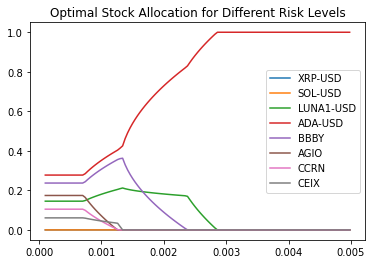

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['XRP-USD','SOL-USD','LUNA1-USD','ADA-USD','BBBY','AGIO','CCRN','CEIX']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

On the left side,  we need to allocate to multiple stocks, this is the best allocation to get the most return under the same risk level. That tells us high diversity reduce the risk!

On the right side, only one asset left in the portfolio,it means with the increasing risk level, only this assets can get the most return, even thougt the return may not increase with the increasing risk!



###efficient frontier 

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.0001, 0.00014000000000000001, 0.00018000000000000004, 0.00022000000000000003, 0.00026000000000000003, 0.00030000000000000003, 0.0003400000000000001, 0.0003800000000000001, 0.00042000000000000007, 0.00046000000000000007, 0.0005000000000000001, 0.0005400000000000001, 0.0005800000000000001, 0.0006200000000000002, 0.0006600000000000002, 0.0007000000000000002, 0.0007400000000000002, 0.0007800000000000002, 0.0008200000000000002, 0.0008600000000000002, 0.0009000000000000002, 0.0009400000000000003, 0.0009800000000000002, 0.0010200000000000003, 0.0010600000000000002, 0.0011000000000000003, 0.0011400000000000004, 0.0011800000000000003, 0.0012200000000000004, 0.0012600000000000003, 0.0013000000000000004, 0.0013400000000000003, 0.0013800000000000004, 0.0014200000000000005, 0.0014600000000000004, 0.0015000000000000005, 0.0015400000000000004, 0.0015800000000000005, 0.0016200000000000003, 0.0016600000000000005, 0.0017000000000000003, 0.0017400000000000004, 0.0017800000000000005, 0.0018200000000000

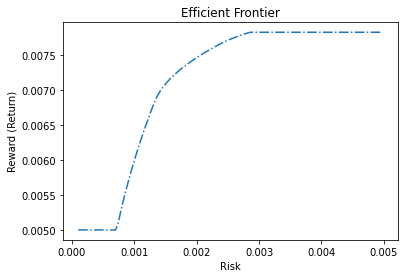

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.')
tmp_risk=risk #save to a tem variable to store the data
tmp_reward=reward #save to a tem variable to store the data
title('Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.show()

For Efficient Frontier, the curve tends to be flatten after reaching 0.003. It tells us that the return will no longer increase with risk when the level reaches 0.003. And we can get a hightest return rate at around 0.008.

## Simulation

### pick up one portfolio

In [ ]:
# select one portfolio allocation returned by your model containing exactly four assets
for i in param_analysis.index: # for each risk ceiling, there are total 123 risk ceiling selected
  s=0  # count the weight great than 0
  for j in param_analysis.columns: # for each asset
    if param_analysis.loc[i,j]>=0.001:   ## if the weight less than 0.001, we assume it equals 0
      s+=1
  if s==4: # containing exact four assets
    print('risk of the portfolio:',i)
    print('weight for this portfolio:')
    print(param_analysis.loc[i,])
    print('average return of the portfolio:',returns[i])

risk of the portfolio: 0.0013000000000000004
weight for this portfolio:
XRP-USD      2.868508e-07
SOL-USD      7.919448e-07
LUNA1-USD    2.087942e-01
ADA-USD      4.138941e-01
BBBY         3.606676e-01
AGIO         3.355382e-06
CCRN         4.988680e-06
CEIX         1.663468e-02
Name: 0.0013000000000000004, dtype: float64
average return of the portfolio: 0.006770864448511624


So lucky! Only one portfolio fits, we don't have to choose.😀

We pick the portfolio with 2 stocks(BBBY 36.07% and CEIX 1.66%) and 2 cryptocurrencies(LUNA1-USD 20.88% and ADA-USD 41.39%)

In [ ]:
# weight for each asset in the portfolio
portfolio = {
    'LUNA1-USD':0.2088,
    'ADA-USD': 0.4139,
    'BBBY': 0.3607,
    'CEIX': 0.0166
}

### Monte Carlo

In [ ]:
# average return for each asset in portfolio
mu1= Avg_Return.loc['LUNA1-USD'][0]
mu2= Avg_Return.loc['ADA-USD'][0]
mu3= Avg_Return.loc['BBBY'][0]
mu4= Avg_Return.loc['CEIX'][0]
# covariance for assest in portfolio
cov_matrix=[]
for i in portfolio:
  cov1=[]
  for j in portfolio:
    cov1.append(Covariance_matrix.loc[i,j])
  cov_matrix.append(cov1)
print(cov_matrix)


[[0.0035323441390250486, 0.0011071826344617377, 0.0003274413590237479, 0.00025065189638962427], [0.0011071826344617377, 0.0028545305016555323, 0.00033680229489109064, -4.533824252753454e-05], [0.0003274413590237479, 0.00033680229489109064, 0.002365086309021057, 0.0005212650124572704], [0.00025065189638962427, -4.533824252753454e-05, 0.0005212650124572704, 0.0027067240485552134]]


In [ ]:
# we suppose to simulate this portfolio for 1000 times single trading day
# use the multivariate distribution to generate the return per day!
resultDF=[]  # this is the collection of return for the portfolio per day
mean = [mu1,mu2,mu3,mu4]
cov = cov_matrix
for i in np.arange(1000):
  # retrun for each asset
  x1,x2,x3,x4 = np.random.multivariate_normal(mean, cov)
  portfolio_return = x1*portfolio['LUNA1-USD'] + x2*portfolio['ADA-USD'] + x3*portfolio['BBBY'] + x4*portfolio['CEIX']
  resultDF.append(portfolio_return)
resultDF

[0.02268810812140277,
 0.024086861223777224,
 0.027379634537591846,
 0.056729978535470495,
 -0.03113374784704847,
 -0.04573833643205183,
 0.01419973222415281,
 0.013530054740755033,
 0.051058419287626736,
 -0.05826403216858557,
 0.03474291745439394,
 -0.040114570606893246,
 0.013852501412679403,
 0.0363965499895744,
 -0.02300987797706892,
 0.007187388166220856,
 0.025758857398341117,
 0.03459767476226511,
 -0.011090439809916279,
 -0.02832970576586611,
 0.008728483670816443,
 0.031891710773734525,
 0.011815360874562624,
 0.008337563856772565,
 0.033123284971000894,
 -0.011587229234460745,
 0.033312428426699375,
 0.02100970558247518,
 0.04686378603607696,
 0.02849541925270389,
 -0.03810927790987082,
 0.03698610526939694,
 0.014845794949772404,
 0.03044624834442515,
 -0.015623594026959144,
 0.04089149116577779,
 -0.02486623850870561,
 0.002316435551009519,
 0.010950438944350879,
 0.04042608182033072,
 0.0321497431418057,
 -0.0073240526117801345,
 0.039441116699948105,
 0.00090537659939975

### Plot the simulation result

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
x= pd.DataFrame(resultDF)
x_mean=x.mean()[0]
print('The average return of the portfolio:',x_mean)

The average return of the portfolio: 0.007258467155768435


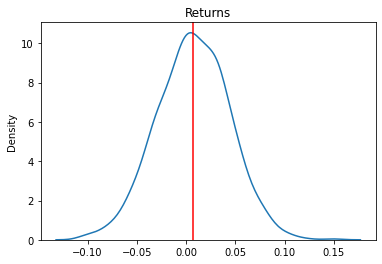

In [ ]:
# draw density plot and the average return
sns.kdeplot(resultDF)
plt.axvline(x_mean,color='red') # add mean value of the monthly profit as a red line
plt.title('Returns') # add the title
plt.show()


We can see from the desity plot, the returns look pretty normal. 

Some of returns are below to 0, which means there is a loss in that day.

And the positive values indicate there is a profit in that day.

## Analysis

### Get the price for the asset in the portpfolio from Jan 1,2021

In [ ]:
# we still use the same portfolio
 # Assign the ticker list that we want to scrap
portfolio_list = ['LUNA1-USD','ADA-USD','BBBY','CEIX']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='12/31/2021',interval='1mo') for ticker in portfolio_list}
dow_prices
# let's extract just the data we need (adjclose)
# get the adjclose price for LUNA1-USD' (one sample)
prep_data = pd.DataFrame(dow_prices['LUNA1-USD']['adjclose']).rename(columns = {"adjclose":'LUNA1-USD'})

# # combine all the tickers (all the rest of the samples)
for i in portfolio_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,LUNA1-USD,ADA-USD,BBBY,CEIX
2021-01-01,1.461070,0.344898,35.330002,8.120000
2021-02-01,5.349641,1.308059,26.860001,10.810000
2021-03-01,18.700575,1.193264,29.150000,9.720000
2021-04-01,16.687428,1.352449,25.320000,8.780000
2021-05-01,6.563471,1.742778,27.990000,15.340000
2021-06-01,6.522355,1.383472,33.290001,18.469999
2021-07-01,10.757215,1.322345,28.540001,21.010000
2021-08-01,31.562357,2.772475,27.540001,22.830000
2021-09-01,38.601673,2.114452,17.270000,26.020000
2021-10-01,42.889774,1.965026,14.040000,27.510000


### calculate the return rate for each assect and portfolio

In [ ]:
#calculate the return rate each month for each assect in the portfolio
return_data = pd.DataFrame()
for i in portfolio_list:
  return_data[i] = prep_data[i].pct_change()
return_data.dropna(inplace=True)
return_data

,LUNA1-USD,ADA-USD,BBBY,CEIX
2021-02-01,2.661454,2.792597,-0.239740,0.331281
2021-03-01,2.495669,-0.087760,0.085257,-0.100833
2021-04-01,-0.107652,0.133403,-0.131389,-0.096708
2021-05-01,-0.606682,0.288609,0.105450,0.747153
2021-06-01,-0.006264,-0.206169,0.189353,0.204042
2021-07-01,0.649284,-0.044184,-0.142685,0.137520
2021-08-01,1.934064,1.096635,-0.035039,0.086625
2021-09-01,0.223029,-0.237341,-0.372912,0.139728
2021-10-01,0.111086,-0.070669,-0.187030,0.057264
2021-11-01,0.392366,-0.208711,0.305556,-0.202108


In [ ]:
# calculate the portfolio retrurn rate each month
return_data['Portfolio_retrun']= return_data['LUNA1-USD']*portfolio['LUNA1-USD']+return_data['ADA-USD']*portfolio['ADA-USD']+return_data['BBBY']*portfolio['BBBY']+return_data['CEIX']*portfolio['CEIX']
return_data

,LUNA1-USD,ADA-USD,BBBY,CEIX,Portfolio_retrun
2021-02-01,2.661454,2.792597,-0.239740,0.331281,1.630593
2021-03-01,2.495669,-0.087760,0.085257,-0.100833,0.513850
2021-04-01,-0.107652,0.133403,-0.131389,-0.096708,-0.016260
2021-05-01,-0.606682,0.288609,0.105450,0.747153,0.043219
2021-06-01,-0.006264,-0.206169,0.189353,0.204042,-0.014954
2021-07-01,0.649284,-0.044184,-0.142685,0.137520,0.068099
2021-08-01,1.934064,1.096635,-0.035039,0.086625,0.846529
2021-09-01,0.223029,-0.237341,-0.372912,0.139728,-0.183857
2021-10-01,0.111086,-0.070669,-0.187030,0.057264,-0.072566
2021-11-01,0.392366,-0.208711,0.305556,-0.202108,0.102399


### calculate the aggregate value of the entire portfolio

In [ ]:
## suppose we invest $1,000,000 on this portfolio at Jan 1,2021
portfolio_values=[1000000]
M=1000000
for i in return_data['Portfolio_retrun']:
  M=M*(1+i)
  portfolio_values.append(M)
portfolio_values

[1000000,
 2630592.635740822,
 3982323.4127403796,
 3917572.2901634225,
 4086884.8247124488,
 4025768.3520498546,
 4299919.130226672,
 7939927.25542693,
 6480115.269719102,
 6009878.682919938,
 6625286.320148015,
 6305247.575212518]

In [ ]:
prep_data['portfolio_values'] = portfolio_values
prep_data

,LUNA1-USD,ADA-USD,BBBY,CEIX,portfolio_values
2021-01-01,1.461070,0.344898,35.330002,8.120000,1.000000e+06
2021-02-01,5.349641,1.308059,26.860001,10.810000,2.630593e+06
2021-03-01,18.700575,1.193264,29.150000,9.720000,3.982323e+06
2021-04-01,16.687428,1.352449,25.320000,8.780000,3.917572e+06
2021-05-01,6.563471,1.742778,27.990000,15.340000,4.086885e+06
2021-06-01,6.522355,1.383472,33.290001,18.469999,4.025768e+06
2021-07-01,10.757215,1.322345,28.540001,21.010000,4.299919e+06
2021-08-01,31.562357,2.772475,27.540001,22.830000,7.939927e+06
2021-09-01,38.601673,2.114452,17.270000,26.020000,6.480115e+06
2021-10-01,42.889774,1.965026,14.040000,27.510000,6.009879e+06


Surprise!!!😆😆😆
We earn more than 5 million during 2021!!!

### What if we invest the money to Dow Jones Index or S&P 500
Lets grab the data for Dow Jones Index and S&P 500 the same period as our portofolio

In [ ]:

 # Assign the ticker list that we want to scrap
ticker_list = ['^DJI','^GSPC']
# pull historical price data for each stocks to match with our news score later
dow_prices = {ticker : si.get_data(ticker,start_date = '01/01/2021',end_date='12/31/2021',interval='1mo') for ticker in ticker_list}
dow_prices

# let's extract just the data we need (adjclose)
# get the adjclose price for ^DJI (one sample)
prep_data = pd.DataFrame(dow_prices['^DJI']['adjclose']).rename(columns = {"adjclose":'^DJI'})

# # combine all the tickers (all the rest of the samples)
for i in ticker_list[1:]:
  prep_data[i] = pd.DataFrame(dow_prices[i]['adjclose'])
prep_data

,^DJI,^GSPC
2021-01-01,29982.619141,3714.239990
2021-02-01,30932.369141,3811.149902
2021-03-01,32981.550781,3972.889893
2021-04-01,33874.851562,4181.169922
2021-05-01,34529.449219,4204.109863
2021-06-01,34502.511719,4297.500000
2021-07-01,34935.468750,4395.259766
2021-08-01,35360.730469,4522.680176
2021-09-01,33843.921875,4307.540039
2021-10-01,35819.558594,4605.379883


In [ ]:
#calculate the return rate for these two index
return_data = pd.DataFrame()
for i in ticker_list:
  return_data[i] = prep_data[i].pct_change()
return_data.dropna(inplace=True)
return_data

,^DJI,^GSPC
2021-02-01,0.031677,0.026091
2021-03-01,0.066247,0.042439
2021-04-01,0.027085,0.052425
2021-05-01,0.019324,0.005486
2021-06-01,-0.000780,0.022214
2021-07-01,0.012549,0.022748
2021-08-01,0.012173,0.028990
2021-09-01,-0.042895,-0.047569
2021-10-01,0.058375,0.069144
2021-11-01,-0.037294,-0.008334


In [ ]:
## suppose we invest $1,000,000 to these two indexes seperately
## Dow Jones
dji_values=[1000000]
M=1000000
for i in return_data['^DJI']:
  M=M*(1+i)
  dji_values.append(M)
# print(dji_values)
## S&P 500
sp500_values=[1000000]
M=1000000
for i in return_data['^GSPC']:
  M=M*(1+i)
  sp500_values.append(M)
# print(sp500_values)

prep_data['dji_values'] = dji_values
prep_data['sp500_values'] = sp500_values
prep_data

,^DJI,^GSPC,dji_values,sp500_values
2021-01-01,29982.619141,3714.239990,1.000000e+06,1.000000e+06
2021-02-01,30932.369141,3811.149902,1.031677e+06,1.026091e+06
2021-03-01,32981.550781,3972.889893,1.100022e+06,1.069637e+06
2021-04-01,33874.851562,4181.169922,1.129816e+06,1.125713e+06
2021-05-01,34529.449219,4204.109863,1.151649e+06,1.131890e+06
2021-06-01,34502.511719,4297.500000,1.150750e+06,1.157033e+06
2021-07-01,34935.468750,4395.259766,1.165191e+06,1.183354e+06
2021-08-01,35360.730469,4522.680176,1.179374e+06,1.217660e+06
2021-09-01,33843.921875,4307.540039,1.128785e+06,1.159737e+06
2021-10-01,35819.558594,4605.379883,1.194677e+06,1.239925e+06


Still earn the moeny investing in these two indexes! We got 1.21 millions and 1.28 millions.

Obviously, it is not as good as our portfolio 👋👋👋

### Change the constraint, at least two stocks will receive at least 10% of the budget each.

In [ ]:
from pyomo.environ import *
m1 = ConcreteModel()

# defining variables
# each one is a stock (XRP_USD, Chemical, LUNA1_USD, AVAX_USD, BBBY,AGIO,CCRN,CEIX)
m1.XRP_USD = Var(within=NonNegativeReals, bounds=(0,1))
m1.SOL_USD = Var(within=NonNegativeReals, bounds=(0,1))
m1.LUNA1_USD = Var(within=NonNegativeReals, bounds=(0,1))
m1.ADA_USD = Var(within=NonNegativeReals, bounds=(0,1))
m1.BBBY = Var(within=NonNegativeReals, bounds=(0,1))
m1.AGIO = Var(within=NonNegativeReals, bounds=(0,1))
m1.CCRN = Var(within=NonNegativeReals, bounds=(0,1))
m1.CEIX = Var(within=NonNegativeReals, bounds=(0,1))
# new vairiable compared to part 2
# at least 2 stocks will be selected from 4 stocks, So， there will be 6 diffeent combination. rename of the 4 stocks as s1,s2,s3,s4
m1.s1_s2= Var(domain= Binary)
m1.s1_s3 = Var(domain = Binary)
m1.s1_s4 = Var(domain = Binary)
m1.s2_s3 = Var(domain = Binary)
m1.s2_s4 = Var(domain = Binary)
m1.s3_s4 = Var(domain = Binary)

In [ ]:
# declare objective
m1.objective = Objective(expr =               
                        m1.XRP_USD*df_return[0] + 
                        m1.SOL_USD*df_return[1] + 
                        m1.LUNA1_USD*df_return[2] +
                        m1.ADA_USD*df_return[3] + 
                        m1.BBBY*df_return[4]+
                        m1.AGIO*df_return[5]+
                        m1.CCRN*df_return[6]+
                        m1.CEIX*df_return[7],
                        sense=maximize) # yes, we want to MAX our returns!

# declare constraints
# 1. Sum of all porportions = 1
m1.sum_proportions = Constraint(expr = m1.XRP_USD + m1.SOL_USD + m1.LUNA1_USD + m1.ADA_USD + m1.BBBY+ m1.AGIO+ m1.CCRN+ m1.CEIX == 1)

# 2. Minimum return should be 0.005 or 0.5%
m1.return_floor = Constraint(expr = m1.objective >= 0.005)

# 3. new constraint: at least 2 stocks will receive at least 10% of budge each
m1.stock_selection = Constraint(expr = m1.s1_s2+m1.s1_s3+m1.s1_s4+m1.s2_s3+m1.s2_s4+m1.s3_s4 ==1) # suppose one combination gets more than 10% budget each
m1.stock_budget1 = Constraint(expr=m1.BBBY* m1.s1_s2+m1.BBBY*m1.s1_s3+m1.BBBY*m1.s1_s4+m1.AGIO*m1.s2_s3+m1.AGIO*m1.s2_s4+m1.CCRN*m1.s3_s4>=0.1)# make sure the stock in the combination receive more than 10% of the budget
m1.stock_budget2 = Constraint(expr=m1.AGIO* m1.s1_s2+m1.CCRN*m1.s1_s3+m1.CEIX*m1.s1_s4+m1.CCRN*m1.s2_s3+m1.CEIX*m1.s2_s4+m1.CEIX*m1.s3_s4>=0.1)# make sure the stock in the combination receive more than 10% of the budget

In [ ]:
# creating calculations table for calculate the risk
# 3. Max risk should be less than 0.005
max_risk = 0.005
def calc_risk():
  # this is a list of all of your investment allocations (proportion invested in each stock)
  # this is UPDATED as the model is cranking - see how we are referncing the decision variables?
  proportions = [m1.XRP_USD,m1.SOL_USD,m1.LUNA1_USD,m1.ADA_USD,m1.BBBY,m1.AGIO,m1.CCRN,m1.CEIX]
  risk_matrix = [] # an empty list
  
  # now we iterate across the covariance matrix
  # 'risk elements' are = cov(A,B)*prop(A)*prop(B)
  # since there are 8 stocks, there are 8*8 = 64 elements
  # sum these 64 elements up at the end! that's the risk.
  for index, col in enumerate(df_cov.columns):
    i = 0
    risk = []
    for row in df_cov[col]:
      risk.append(proportions[index]*row*proportions[i])
      i = i + 1
    risk_matrix.append(risk)
  risk_matrix = pd.DataFrame(risk_matrix)
  return risk_matrix.sum().sum() 

# defining risk limits, with the least 0.0001 to the most 0.005,step 0.00004. totally 123 risk ceiling.
# this is a sequence of options - better!
risk_limits = np.arange(0.0001, 0.005, 0.00004) # take tiny steps

### under different risk ceiling, run model 1

In [ ]:
# updating risk contraint for each limit and then solving the problem
param_analysis = {} # key=risk, value =stock allocations 
returns = {} # key=risk, value = return
for r in risk_limits:
  m1.total_risk = Constraint(expr = calc_risk() <= r)
  # run solver
  result = SolverFactory('ipopt', executable=ipopt_executable).solve(m1).write()
  # store our allocation proportions
  param_analysis[r] = [m1.XRP_USD(),m1.SOL_USD(),m1.LUNA1_USD(),m1.ADA_USD(),m1.BBBY(),m1.AGIO(),m1.CCRN(),m1.CEIX()]
  # store our returns
  returns[r] =  m1.XRP_USD()*df_return[0] + m1.SOL_USD()*df_return[1] + m1.LUNA1_USD()*df_return[2] + m1.ADA_USD()*df_return[3] + m1.BBBY()*df_return[4]+m1.AGIO()*df_return[5]+m1.CCRN()*df_return[6]+m1.CEIX()*df_return[7]

    model.name="unknown";
      - termination condition: infeasible
      - message from solver: Ipopt 3.12.13\x3a Converged to a locally
        infeasible point. Problem may be infeasible.
# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Lower bound: -inf
  Upper bound: inf
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 14
  Sense: unknown
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: warning
  Message: Ipopt 3.12.13\x3a Converged to a locally infeasible point. Problem may be infeasible.
  Termination condition: infeasible
  Id: 200
  Error rc: 0
  Time

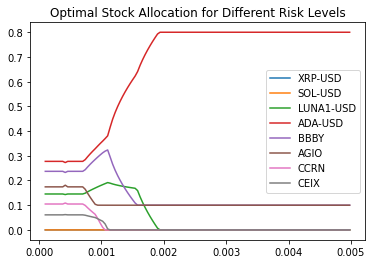

In [ ]:
# generating the dataframe for proportions of the portfolio for each risk limit
param_analysis = pd.DataFrame.from_dict(param_analysis, orient='index')
param_analysis.columns = ['XRP-USD','SOL-USD','LUNA1-USD','ADA-USD','BBBY','AGIO','CCRN','CEIX']
param_analysis.plot()
plt.title('Optimal Stock Allocation for Different Risk Levels')
plt.show()

With the new restriciton, at the righ side, there are three assect left(2 stocks(BBBy,AGIO),1 currncystock(ADA-USD))

### Efficient Frontier with new constraints

In [ ]:
# subset
risk = list(returns.keys()) # coerce dict_keys to a list
print(risk)
reward = list(returns.values()) # coerce dict_values to a list
print(reward) # we aren't allowed to name our value 'return' - this is a reserved name.

[0.0001, 0.00014000000000000001, 0.00018000000000000004, 0.00022000000000000003, 0.00026000000000000003, 0.00030000000000000003, 0.0003400000000000001, 0.0003800000000000001, 0.00042000000000000007, 0.00046000000000000007, 0.0005000000000000001, 0.0005400000000000001, 0.0005800000000000001, 0.0006200000000000002, 0.0006600000000000002, 0.0007000000000000002, 0.0007400000000000002, 0.0007800000000000002, 0.0008200000000000002, 0.0008600000000000002, 0.0009000000000000002, 0.0009400000000000003, 0.0009800000000000002, 0.0010200000000000003, 0.0010600000000000002, 0.0011000000000000003, 0.0011400000000000004, 0.0011800000000000003, 0.0012200000000000004, 0.0012600000000000003, 0.0013000000000000004, 0.0013400000000000003, 0.0013800000000000004, 0.0014200000000000005, 0.0014600000000000004, 0.0015000000000000005, 0.0015400000000000004, 0.0015800000000000005, 0.0016200000000000003, 0.0016600000000000005, 0.0017000000000000003, 0.0017400000000000004, 0.0017800000000000005, 0.0018200000000000

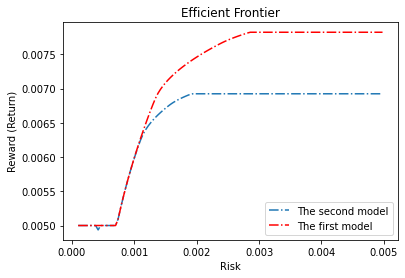

In [ ]:
# plot! pylab makes it easy
from pylab import *
plot(risk, reward, '-.',label='The second model')
plot(tmp_risk,tmp_reward,'-.',color='red',label='The first model')
title('Efficient Frontier')
xlabel('Risk')
ylabel('Reward (Return)')
plt.legend()
plt.show()

**Influence of the new constraint**

Compared to the fisrt model, where we can get the highest return at around 0.008. This model, we can only get the highest retrun at around 0.00680.

ALso, compared to the first Efficient Frontier, when the risk level over around 0.0012, The return of second model(model with more constraints) is lower than the first model.

## Conclusion

1. The covariance matrix shows us the apparent relationship between two variables. It shows that when the covariance’s positive, the stocks move together in the same direction. However, if the covariance is negative, the stocks move in the opposite direction. 


2. An efficient fronteir gives us the optimal combination of the portfolio at each risk level. According to the plot, we could know the more we diversify the portfolio, the lower risk we may afford. But at same time, it will bring us a lower return as well. 

3. In our case, efficient fronteir shows us that if the risk level goes over 0.003, our return will not increase therefore we would achieve the highest return rate at a risk level of around 0.008. 

4. Since our goal was to allocate our money into stocks to maximize the expected return, the best portfolio is when the line reached the highest point. However, there is one one cryptocurriencies in the portfolio when the line reach the peak. Since we need to consider both risk and reward when choosing the stocks to include in our portfolio. It is obvious that maxmium rewards is not the most optimal portfolio. It was important to diversify our portfolio so overall we can afford more risk. Higher diversity reduces risks. 

5. We pick the portfolio with 2 stocks and 2 cryptocurrencies. Here is the weight for our portfolio 'LUNA1-USD'is 0.2088, 'ADA-USD' is 0.4139, 'BBBY' is 0.3607, 'CEIX' is 0.0166.

6. If we invested $1,000,000 to each within the same time period, our portfolio earned more than 5 million during 2021, whereas the Dow Jones Index and S&P 500 got 1.21 millions and 1.28 millions.
So, Our portfolio was able to beat the Dow Jones Index and S&P 500. 

7. The addition of more constraints in the second model actually gave us a lower return than the first. 

Every member worked on each part equally. Team members cooperated well.

For preparation part, helpful comments from everyone helped us pick the best 8 cryptocurrencies and stocks within the constraints of market capacity.

For modeling part, Meng Zhang has made the most contributions.

For the analysis part, Nabilla Harahap and Ziyi Liu completed this part. At the same time, Meng Zhang made useful suggestions to improve model performance and refine analysis results. In the end, Nabilla Harahap finished the video to present our project.